* [1.Description des données](#dd)
* [2.Nettoyage](#ne)
* [3.Choix des variables cibles (les émissions de CO2 et  la consommation totale d’énergie)](#cv)
* [4.Analyse exploratoire](#ae)
* [5.Sauvegarde des données dans un fichier csv](#cs)

In [185]:
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt 
import folium
from folium import plugins
warnings.filterwarnings('ignore')

# 1.Description des données <a class="anchor" id="dd"></a>

In [186]:
df=pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [187]:
df.shape

(3376, 46)

In [188]:
df.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   
3                    0659000640  ...      8.115253e+05         2768924.0   
4                    0659000970  ...      1.573449e+06         5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   
3         18112.13086         1811213.0        False       NaN   
4         88039.98438         8803998.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  
3         Compliant      NaN             286.43                   4.67  
4         Compliant      NaN             505.01                   2.88  

[5 rows x 46 columns]

In [189]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [190]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [191]:
#batiments non destinés à l'habitation
df = df[~df['BuildingType'].str.contains("Multifamily")]
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

<AxesSubplot:>

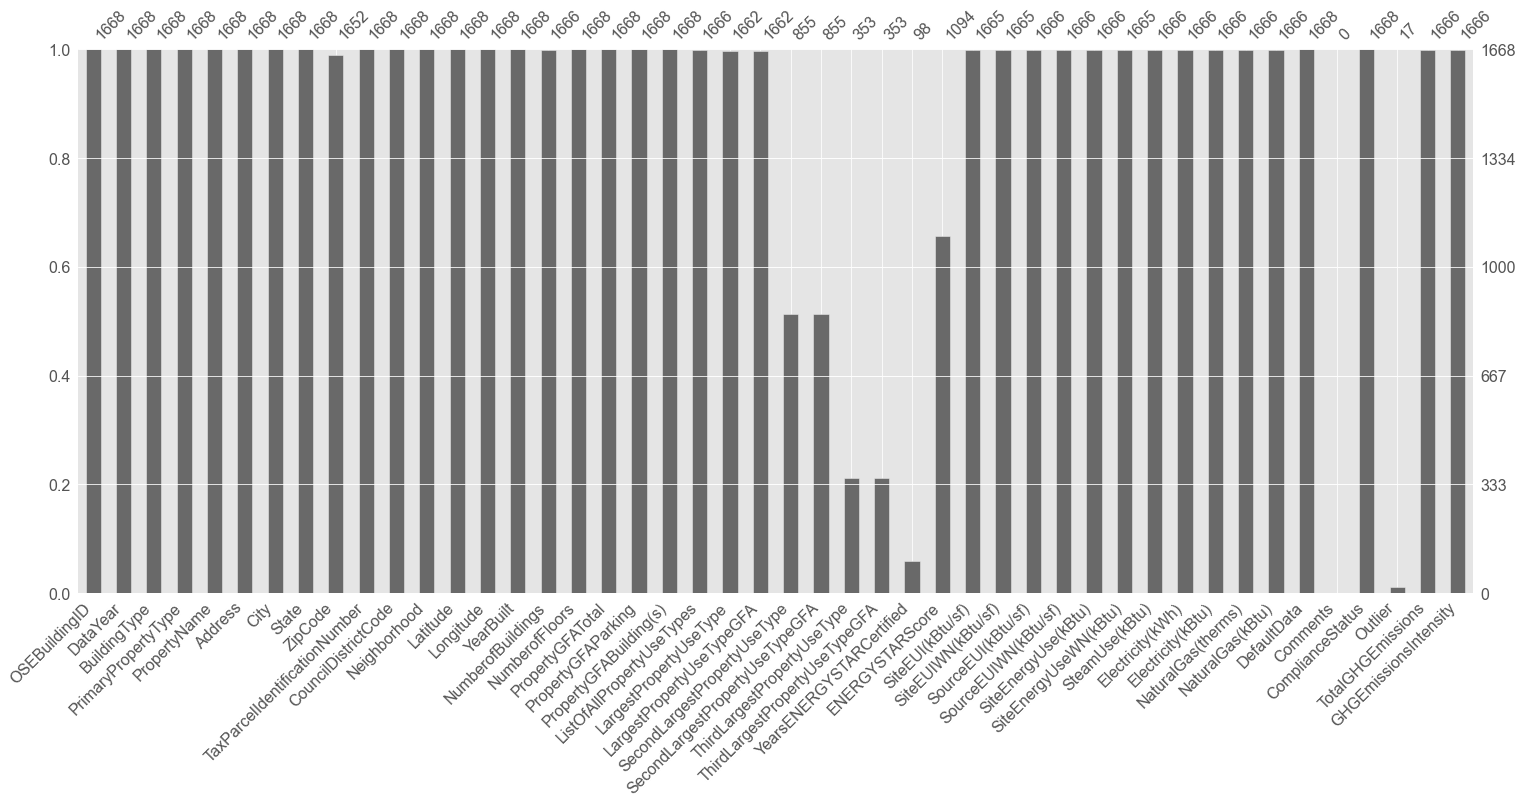

In [192]:
msno.bar(df)

In [193]:
#Vérification de l'emplacement
import folium
map = folium.Map()
map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()],zoom_start=10)
for i in range(0,len(df)):
    folium.Circle([df.iloc[i]['Latitude'],df.iloc[i]['Longitude']], 
                      popup=df.iloc[i]['Address'], radius =100).add_to(map)
map

**Observation**
<br>
Il s'agit bien des batiments dans Seattle

# 2.Choix des variables cibles (les émissions de CO2 et la consommation totale d’énergie)

In [194]:
target1='TotalGHGEmissions'
target2='SiteEnergyUse(kBtu)'

# 3.Nettoyage<a class="anchor" id="ne"></a>

In [195]:
df.shape

(1668, 46)

In [196]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

### Suppression de quelques variables

In [197]:
# suppressions des variables qui ne nous intéressent pas
df.drop(['State','ZipCode','City'], axis=1, inplace=True)#deja State et City ont chacun une seule valeur

In [198]:
df.shape

(1668, 43)

In [199]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'TaxParcelIdentificationNumber',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier',
       'TotalGHGEmissions', 'GHG

In [200]:
columns_to_drop = ['PropertyName', #similaire à ID
                   'TaxParcelIdentificationNumber', #similaire à ID
                 
                   'Electricity(kBtu)',
                   'NaturalGas(kBtu)',
                   'SteamUse(kBtu)',
                   'NaturalGas(therms)',
                   'Electricity(kWh)',
                   
                   'Comments',#vide
                   'DefaultData', #utilité de la variable inconnue
                   'Address', #non conservé (latitude et longitude préférées)
                   'CouncilDistrictCode',
                   
                   'YearsENERGYSTARCertified', #données incomplètes
                   'SiteEUI(kBtu/sf)'#calculable a partir de SiteEnergyUse(kBtu)                  
                  ]

In [201]:
#supprimer la colonne Comments qui est vide
df = df.drop(columns_to_drop, axis=1)

In [202]:
df.shape

(1668, 30)

In [203]:
#Suppression des variables avec suffixe WN qui indiquent Weather Normalized
def find_component(df, suffix=None):
    componant = []
    for col in df.columns:
        if suffix in col: 
            componant.append(col)
    return componant
df.drop(find_component(df,'WN'), axis=1, inplace=True)

In [204]:
df.shape

(1668, 27)

In [205]:
df.shape

(1668, 27)

### Suppression de quelques lignes

In [206]:
#Vérification des valeurs négatives
df.min()

OSEBuildingID                                        1
DataYear                                          2016
BuildingType                                    Campus
PrimaryPropertyType                Distribution Center
Neighborhood                                   BALLARD
Latitude                                      47.49917
Longitude                                   -122.41182
YearBuilt                                         1900
NumberofBuildings                                  0.0
NumberofFloors                                       0
PropertyGFATotal                                 11285
PropertyGFAParking                                   0
PropertyGFABuilding(s)                            3636
LargestPropertyUseTypeGFA                       5656.0
SecondLargestPropertyUseTypeGFA                    0.0
ThirdLargestPropertyUseTypeGFA                     0.0
ENERGYSTARScore                                    1.0
SourceEUI(kBtu/sf)                                 0.0
SiteEnergy

In [207]:
#supprimer les lignes avec TotalGHGEmissions<=0
df = df[df['TotalGHGEmissions'] >0]
df.shape

(1659, 27)

In [208]:
df = df[df['GHGEmissionsIntensity'] >0]
df.shape

(1657, 27)

In [209]:
df = df[df['SiteEnergyUse(kBtu)'] >0]
df.shape

(1646, 27)

In [210]:

df = df[df['SourceEUI(kBtu/sf)'] >0]
df.shape

(1645, 27)

In [211]:
#supprimer les lignes contenat que des nan
df.dropna(how = 'all', axis=0, inplace=True)
df.shape

(1645, 27)

In [212]:
#supprimer les lignes avec target1 à nan
df = df[df[target1].notna()]
df.shape

(1645, 27)

In [213]:
#supprimer les lignes avec target2 à nan
df = df[df[target2].notna()]
df.shape

(1645, 27)

In [214]:
df['Outlier'].unique() #trop de données manquantes

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [215]:
df=df[df['Outlier']!='High outlier']
df = df.drop(['Outlier'], axis=1)

In [216]:
df['ComplianceStatus'].unique() #trop de données manquantes

array(['Compliant', 'Error - Correct Default Data', 'Non-Compliant'],
      dtype=object)

In [217]:
df=df[df['ComplianceStatus']!='Error - Correct Default Data']
df = df.drop(['ComplianceStatus'], axis=1)

### Imputation

In [218]:
#un batiment a au moins NumberofBuildings=1 et NumberofFloors=1                        0
df['NumberofBuildings']=df['NumberofBuildings'].replace([0], 1)
df['NumberofFloors']=df['NumberofFloors'].replace([0], 1)

In [219]:
#Imputer les variables numériques par 0
numercial_cols = [col for col in df.columns if df[col].dtype!="O"]
df[numercial_cols]=df[numercial_cols].fillna(df[numercial_cols].mean())

In [220]:
# imputer les variables catégorielles par la valeur la plus fréquente
categoricla_cols = [col for col in df.columns if df[col].dtype=="O"]

df[categoricla_cols]=df[categoricla_cols].fillna(df.mode().iloc[0])

<AxesSubplot:>

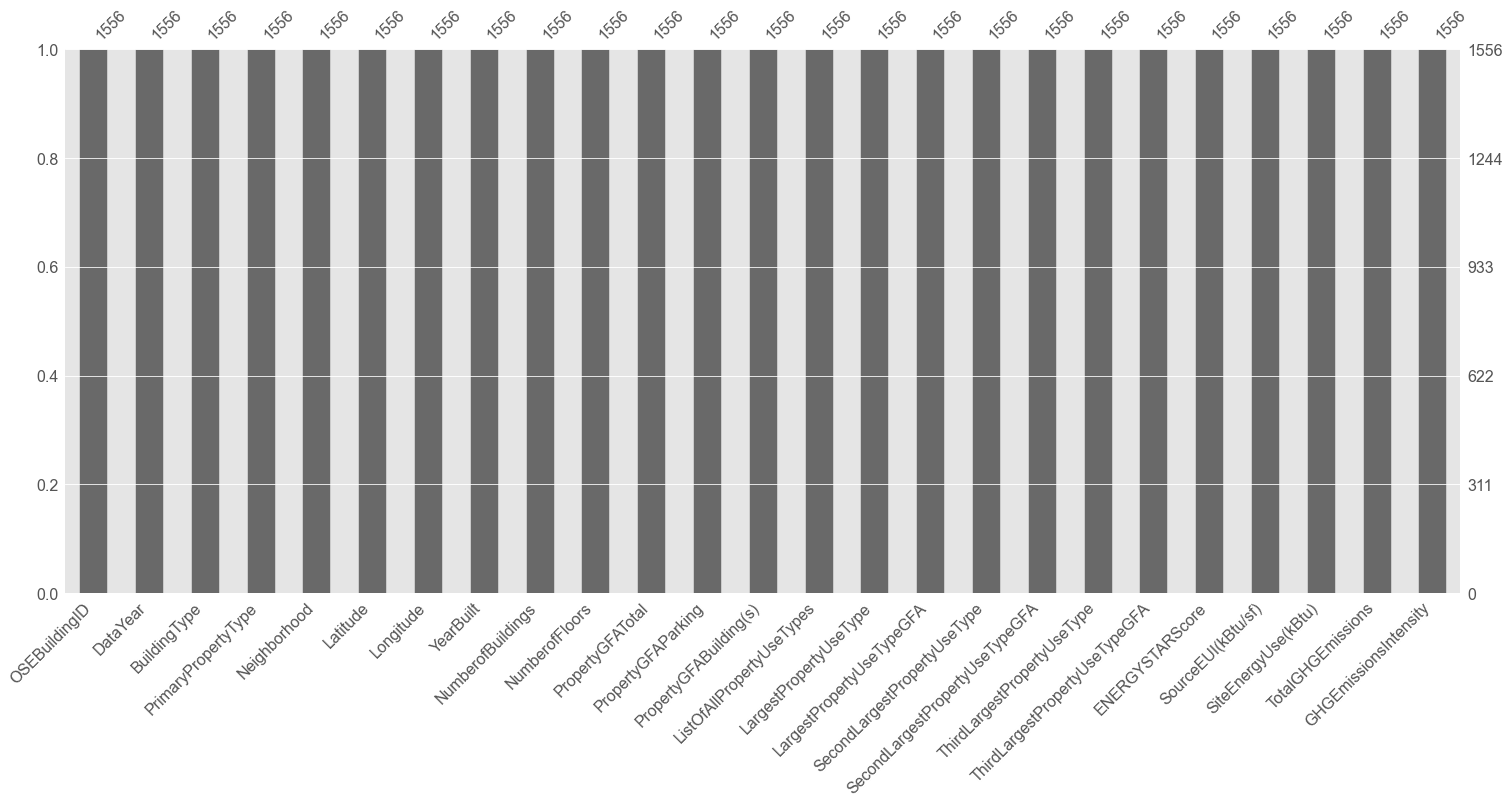

In [221]:
msno.bar(df)

In [222]:
list(df.columns)

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

# 4.Analyse exploratoire <a class="anchor" id="ae"></a>

### Analyse univariée

In [223]:
font_title = {'family': 'serif',
             'color':  '#114b98',
             'weight': 'bold',
            'size': 18,
            }

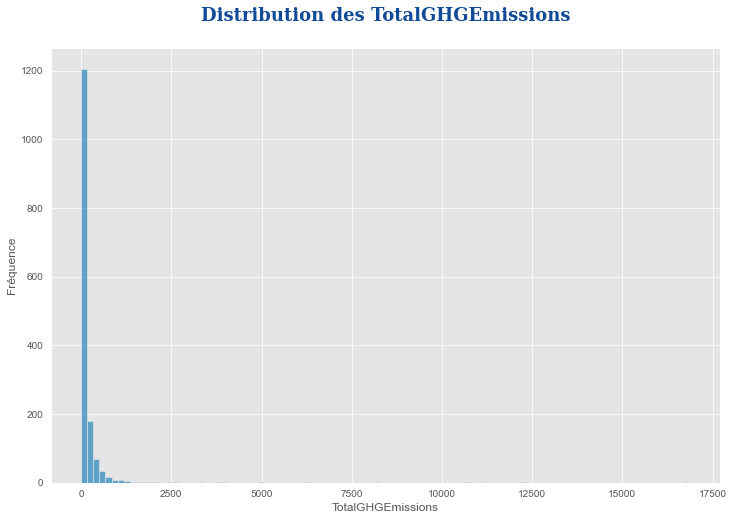

In [224]:
#Distribution de 'TotalGHGEmissions'
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='TotalGHGEmissions', bins=100)

ax.set_xlabel("TotalGHGEmissions")
ax.set_ylabel("Fréquence")
plt.title(f"Distribution des TotalGHGEmissions\n", fontdict=font_title)
plt.show()

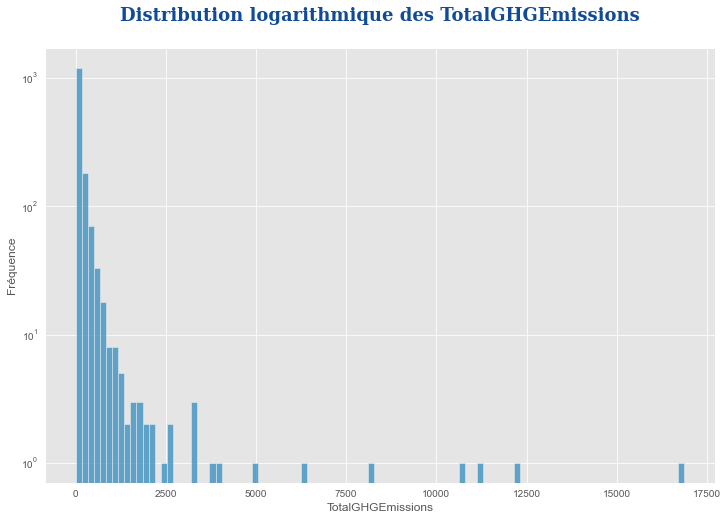

In [225]:
#Distribution logarithmique de 'TotalGHGEmissions'
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='TotalGHGEmissions', bins=100)
ax.set_yscale('log')
ax.set_xlabel("TotalGHGEmissions")
ax.set_ylabel("Fréquence")
plt.title(f"Distribution logarithmique des TotalGHGEmissions\n", fontdict=font_title)
plt.show()

**Observation**
<br>
la cible 'TotalGHGEmissions' ne suit pas la loi normale.

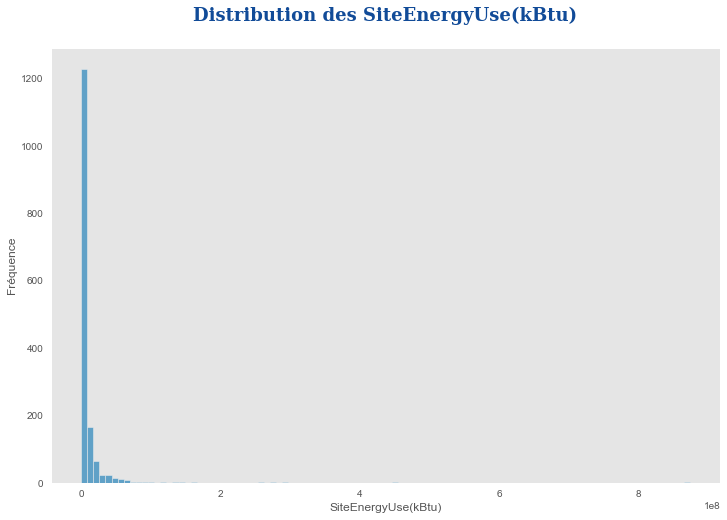

In [226]:
#Distribution de 'SiteEnergyUse(kBtu)'
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='SiteEnergyUse(kBtu)', bins=100)

ax.set_xlabel("SiteEnergyUse(kBtu)")
ax.set_ylabel("Fréquence")
plt.title(f"Distribution des SiteEnergyUse(kBtu)\n", fontdict=font_title)
plt.grid()
plt.show()

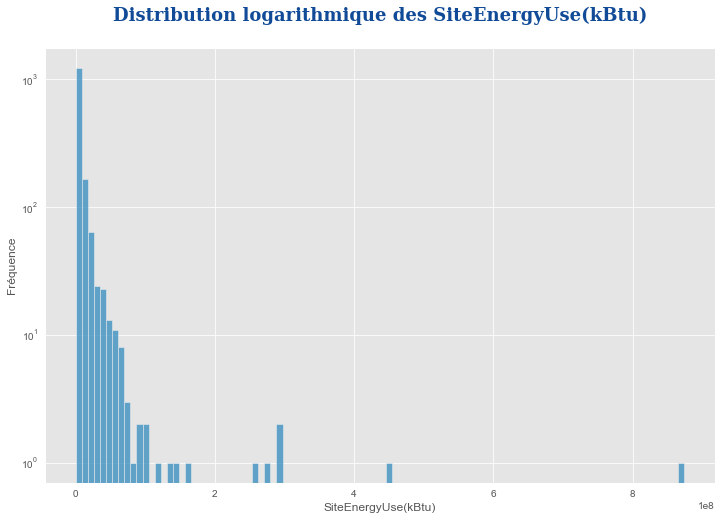

In [227]:
#Distribution logarithmique de 'SiteEnergyUse(kBtu)'
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='SiteEnergyUse(kBtu)',bins=100)
ax.set_yscale('log')
ax.set_xlabel("SiteEnergyUse(kBtu)")
ax.set_ylabel("Fréquence")
plt.title(f"Distribution logarithmique des SiteEnergyUse(kBtu)\n", fontdict=font_title)
plt.show()

**Observation**
<br>
la cible 'SiteEnergyUse(kBtu)' ne suit pas la loi normale.

In [228]:
DataYear=df['DataYear']

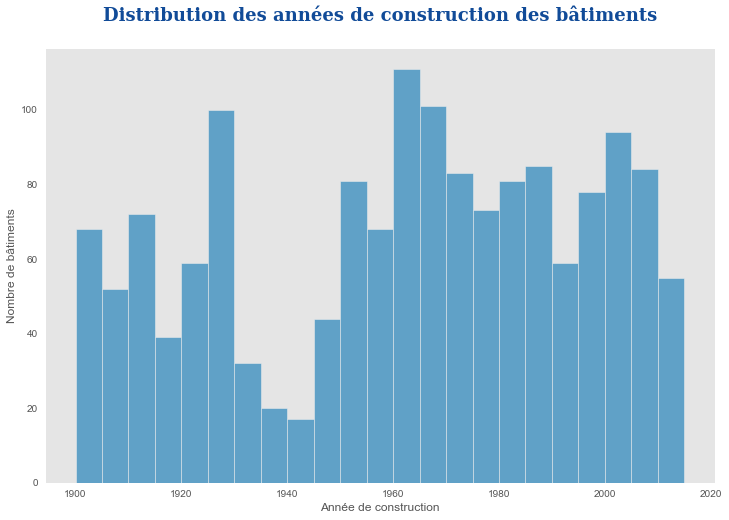

In [229]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='YearBuilt', bins=int((df.YearBuilt.max() - df.YearBuilt.min())/5))
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n", fontdict=font_title)
plt.grid()
plt.show()

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


Text(0, 0.5, 'SiteEnergyUse(kBtu)')

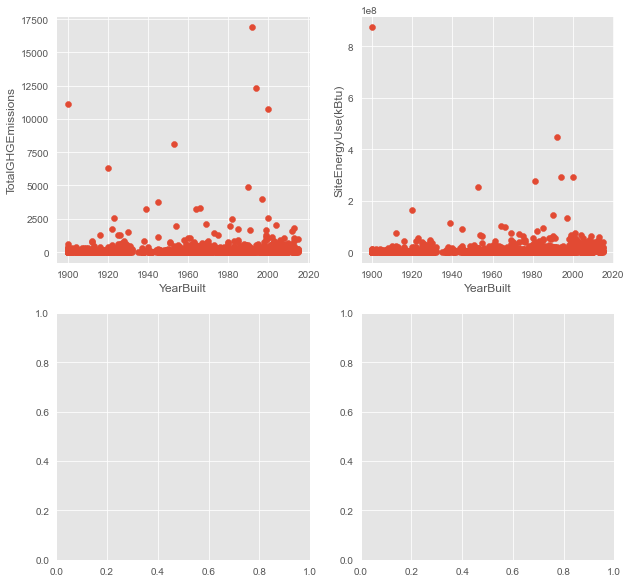

In [230]:
    
f, axes = plt.subplots(nrows = 2, ncols = 2,figsize=(10, 10))
print(axes)
axes[0][0].scatter(df['YearBuilt'],df[target1])
axes[0][0].set_xlabel('YearBuilt')
axes[0][0].set_ylabel(target1)
axes[0][1].scatter(df['YearBuilt'], df[target2])
axes[0][1].set_xlabel('YearBuilt')
axes[0][1].set_ylabel(target2)


**Observations**
<br>
La plupart des batiments sont construits après 1950

In [231]:
##### ajouter une colonne tranche_date selon la variale YearBuilt
df['tranche_date'] = None
df.tranche_date[df.YearBuilt < 1950] = 'tranche_date1'
df.tranche_date[(df.YearBuilt >= 1950) & (df.YearBuilt<1980)] = 'tranche_date2'
df.tranche_date[(df.YearBuilt >= 1980) & (df.YearBuilt<2000)] = 'tranche_date3'
df.tranche_date[df.YearBuilt >= 2000] = 'tranche_date4'

In [232]:
df['tranche_date'] .unique()

array(['tranche_date1', 'tranche_date3', 'tranche_date2', 'tranche_date4'],
      dtype=object)

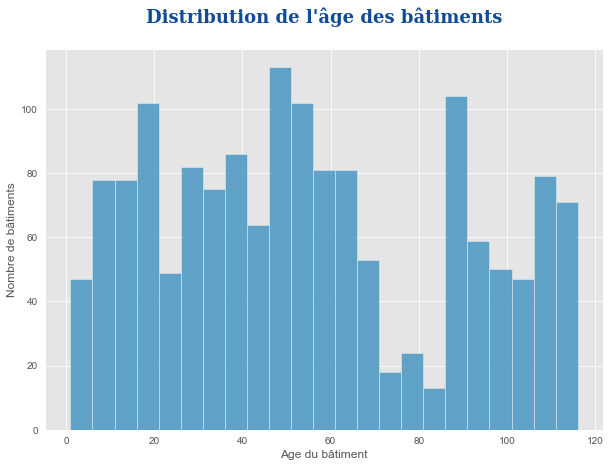

In [233]:
#Ajout de la variable age 
df['BuildingAge'] = DataYear - df['YearBuilt']
df.drop(['YearBuilt','DataYear'], axis=1, inplace=True)
  
fig = plt.figure(figsize=(10,7))
ax = sns.histplot(data=df, x='BuildingAge', bins=int((df.BuildingAge.max() - df.BuildingAge.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments\n", fontdict=font_title)
plt.show()

In [234]:
df.shape

(1556, 25)

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


Text(0, 0.5, 'SiteEnergyUse(kBtu)')

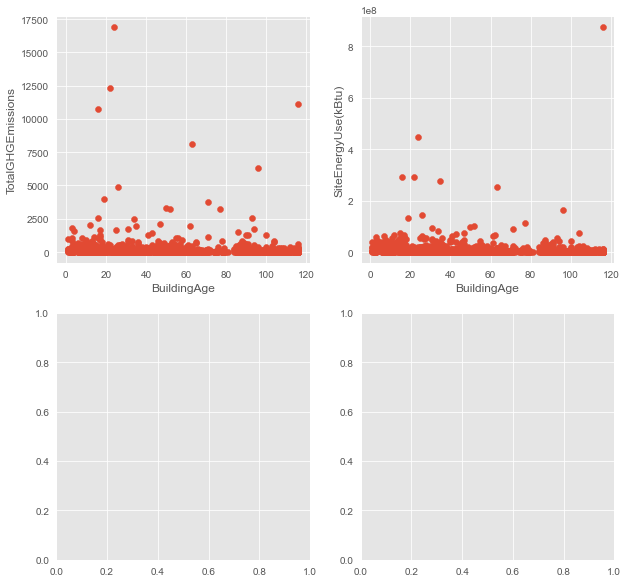

In [235]:
f, axes = plt.subplots(nrows = 2, ncols = 2,figsize=(10, 10))
print(axes)
axes[0][0].scatter(df['BuildingAge'],df[target1])
axes[0][0].set_xlabel('BuildingAge')
axes[0][0].set_ylabel(target1)
axes[0][1].scatter(df['BuildingAge'], df[target2])
axes[0][1].set_xlabel('BuildingAge')
axes[0][1].set_ylabel(target2)

**Observations**
<br>
La plupart des batimentssont agés moins de 70 ans.

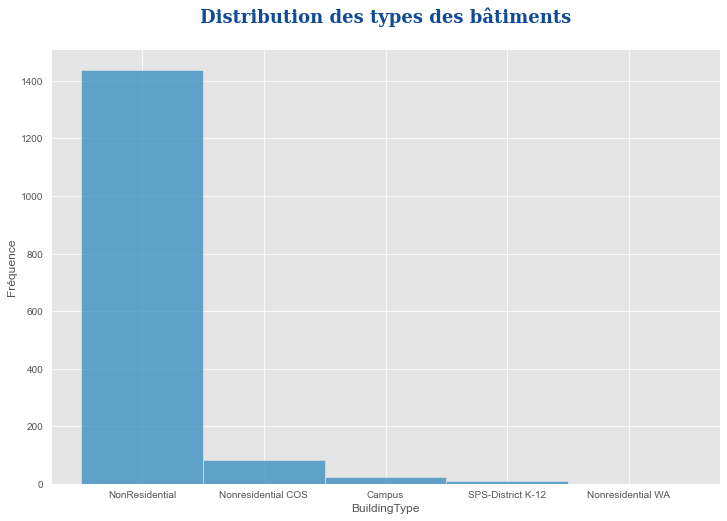

In [236]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='BuildingType')
ax.set_xlabel("BuildingType")
ax.set_ylabel("Fréquence")
plt.title(f"Distribution des types des bâtiments\n", fontdict=font_title)
plt.show()

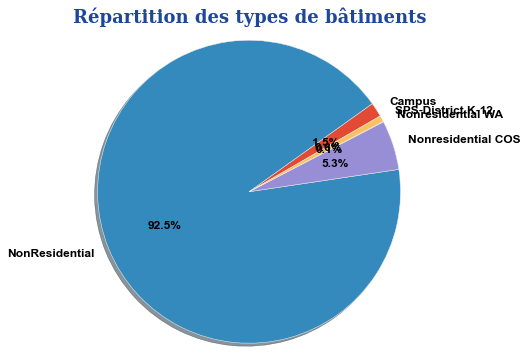

In [237]:
building_type = df.groupby(by='BuildingType')['OSEBuildingID'].nunique()
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(building_type.values, labels=building_type.index, 
       autopct='%1.1f%%', shadow=True, startangle=30,
       textprops=dict(color="black",size=12, weight="bold"))
ax.axis('equal')
ax.set_title("Répartition des types de bâtiments", fontdict=font_title)
plt.show()

**Note**
<br>
La plupart des types sont non residential
<br>
par contre nonresidential wa represente la plus petite tranche.Regardons ça de près

In [238]:
df[df['BuildingType']=="Nonresidential WA"].shape

(1, 25)

**Note**
<br>il ya une seule ligne avec "Nonresidential WA" donc on va la supprimer 

In [239]:
index_to_drop=df[df['BuildingType']=="Nonresidential WA"].index
df.drop(index_to_drop, inplace=True)
df.shape

(1555, 25)

In [240]:
df.loc[(df['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    283
Other                          182
Warehouse                      178
Large Office                   165
Mixed Use Property             100
Retail Store                    86
Hotel                           76
Worship Facility                71
Distribution Center             51
Supermarket / Grocery Store     39
K-12 School                     39
Medical Office                  38
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             2
Name: PrimaryPropertyType, dtype: int64

**Observation**
<br>
 La plus grande part des bâtiments non résidentiels sont des bureaux de petite et moyenne taille 

**Observation**
<br> il ya des outliers apres 9.e6 ==> supprimer les lignes correspondantes

In [241]:
df[df['PropertyGFATotal']>9000000]

OSEBuildingID BuildingType PrimaryPropertyType Neighborhood  Latitude  \
3274          49967       Campus          University    NORTHEAST  47.65644   

      Longitude  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
3274 -122.31041              111.0               1           9320156   

      PropertyGFAParking  ...  SecondLargestPropertyUseTypeGFA  \
3274                   0  ...                     36266.253021   

     ThirdLargestPropertyUseType ThirdLargestPropertyUseTypeGFA  \
3274                      Office                   15054.316181   

      ENERGYSTARScore SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  \
3274        63.921236         246.600006          873923712.0   

     TotalGHGEmissions  GHGEmissionsIntensity   tranche_date  BuildingAge  
3274          11140.56                    1.2  tranche_date1          116  

[1 rows x 25 columns]

**Observation**
<br>
Quelques valeurs sont beaucoup trop éloignées des autres et risquent de nous gêner dans l'analyse; nous allons les éliminer :

In [242]:
index_to_drop=df[df['PropertyGFATotal']>9000000].index
df.drop(index_to_drop, inplace=True)
df.shape

(1554, 25)

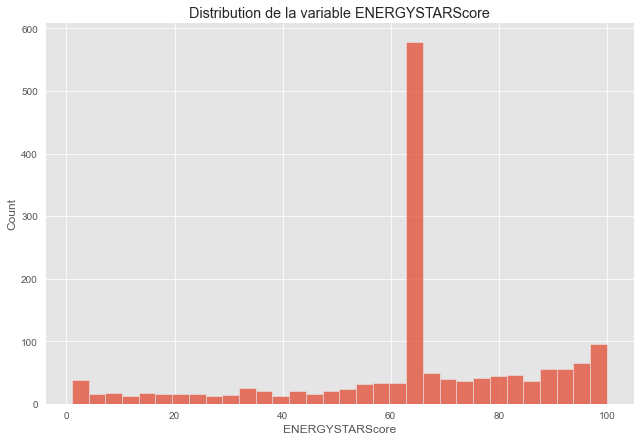

In [243]:
anaghg=sns.displot(df['ENERGYSTARScore'], palette='bright', height=6, aspect=1.5)

anaghg.set(title="Distribution de la variable ENERGYSTARScore")

**Observation**
<br>
LA plupart des patiments ont un score >50

In [244]:
df.groupby(by='BuildingType')['ENERGYSTARScore'].mean()

BuildingType
Campus                62.329663
NonResidential        63.820017
Nonresidential COS    63.245994
SPS-District K-12     87.684247
Name: ENERGYSTARScore, dtype: float64

**Observation**
<br>
Les batiments de type SPS-District K-12 ont les meillers score >85%


In [245]:
df.shape

(1554, 25)

#### Regroupement des classes

In [246]:
cat_cols = [col for col in df.columns if df[col].dtype=="O"]
cat_cols

['BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'tranche_date']

In [247]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Campus',
       'SPS-District K-12'], dtype=object)

In [248]:
df['Neighborhood'].unique()

array(['DOWNTOWN', 'NORTHEAST', 'EAST', 'LAKE UNION', 'GREATER DUWAMISH',
       'MAGNOLIA / QUEEN ANNE', 'BALLARD', 'NORTHWEST', 'CENTRAL',
       'SOUTHWEST', 'SOUTHEAST', 'DELRIDGE', 'NORTH', 'North', 'Delridge',
       'Ballard', 'Northwest', 'Central', 'DELRIDGE NEIGHBORHOODS'],
      dtype=object)

In [249]:
df['groups_neighborhood'] = None
df.groups_neighborhood[df['Neighborhood']. isin(['NORTH', 'North', 'NORTHEAST', 'NORTHWEST', 'Northwest'])] = 'North'
df.groups_neighborhood[df['Neighborhood']. isin(['SOUTHEAST', 'SOUTHWEST'])] = 'South'
df.groups_neighborhood[df['Neighborhood']. isin(['CENTRAL', 'Central'])] = 'Central'
df.groups_neighborhood[df['Neighborhood']. isin( ['DELRIDGE', 'Delridge', 'DELRIDGE NEIGHBORHOODS', 'BALLARD', 'Ballard', 'DOWNTOWN', 'EAST', 
                                          'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',])] = 'Various'

df.drop(['Neighborhood'],axis=1,inplace=True)

In [250]:
df['groups_neighborhood'].unique()

array(['Various', 'North', 'Central', 'South'], dtype=object)

In [251]:
df['groups_PrimaryPropertyType'] = None
df.groups_PrimaryPropertyType[df['PrimaryPropertyType']. isin(['Hospital','Laboratory','Medical Office','Senior Care Community'])] = 'Health'
df.groups_PrimaryPropertyType[df['PrimaryPropertyType']. isin(['Retail Store','Supermarket / Grocery Store', 'Distribution Center','Restaurant',  'Refrigerated Warehouse','Warehouse','Self-Storage Facility'])] = 'Commerce'
df.groups_PrimaryPropertyType[df['PrimaryPropertyType']. isin( ['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property','Worship Facility','Residence Hall',
                 'Small- and Mid-Sized Office','Large Office','Low-Rise Multifamily','High-Rise Multifamily','Office',
                   'University', 'K-12 School'])] = 'Various'
df.drop(['PrimaryPropertyType'],axis=1,inplace=True)

In [252]:
df['groups_PrimaryPropertyType'].unique()


array(['Various', 'Commerce', 'Health'], dtype=object)

In [253]:
df.columns

Index(['OSEBuildingID', 'BuildingType', 'Latitude', 'Longitude',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'tranche_date', 'BuildingAge',
       'groups_neighborhood', 'groups_PrimaryPropertyType'],
      dtype='object')

### Analyse bivariée

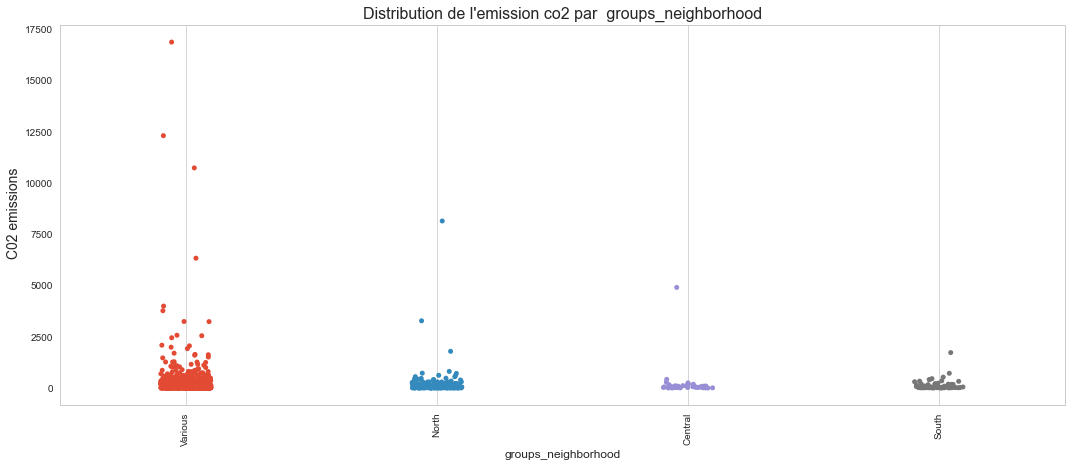

In [254]:

fig=plt.figure(figsize=[18,7])
#fig.patch.set_facecolor('#E0E0E0')
#fig.patch.set_alpha(0.7)
sns.set_style('whitegrid')
plt.title("Distribution de l'emission co2 par  {}".format('groups_neighborhood'),size=16)
#sns.boxplot(x='groups_neighborhood', y="TotalGHGEmissions", data=df,color="#cbd1db")

ax = sns.stripplot(x='groups_neighborhood', y="TotalGHGEmissions",data=df)

plt.ylabel(" C02 emissions",size=14)
plt.xticks(range(0,len(df['groups_neighborhood'].unique()))
               ,df['groups_neighborhood'].unique(),rotation=90)

plt.grid()
plt.show()

In [255]:
df[df["TotalGHGEmissions"]>2500].shape

(13, 25)

**Observation** 
<br>
il ya que 14 ligne dont la consommation de co2est >2500 (ce qui represente 0.84% des donnés).
<br>
A supprimer

In [256]:
df=df[df["TotalGHGEmissions"]<=2500]

### Analyse multivariée

**Observation**

In [257]:
df.columns

Index(['OSEBuildingID', 'BuildingType', 'Latitude', 'Longitude',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'tranche_date', 'BuildingAge',
       'groups_neighborhood', 'groups_PrimaryPropertyType'],
      dtype='object')

In [258]:
numercial_cols = [col for col in df.columns if df[col].dtype!="O"]
numercial_cols

['OSEBuildingID',
 'Latitude',
 'Longitude',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'BuildingAge']

In [259]:
target2

'SiteEnergyUse(kBtu)'

In [260]:
df['BuildingAge'].unique()

array([ 89,  20,  47,  90,  36,  17, 112,  18,  88,  94,  12,  86,  33,
       109, 100,  31,  15,  25,  38, 110,  22,  61,  55,  26, 116,  62,
       105,  43,  96, 106,  34, 108,  57,  16,  19,  54,  46,   8,  51,
        87,   6,  78,  30,  14,  93,  13,  75,  10, 101,  66,  58,   7,
         5,  45,   9,  65,  52,  79,  50,  59,  48,  92,  11,  85,  44,
        64, 102, 103,  21,  35,  27,  91,  40, 107,  28,  37,  69,  32,
        60, 104,  39,  56,  71,  24,  53,  42,  41,  70,  49,  29,  67,
        76,  63,  84,  68,  23,  98, 111, 114,  95,  77,  72,  99,  74,
       113,   4,   3,  97, 115,  80,  81,   2,   1], dtype=int64)

In [261]:
var_to_scatter_target1=['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'ENERGYSTARScore',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
  'GHGEmissionsIntensity',
 'BuildingAge']

In [262]:
var_to_scatter_target2=[ 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'ENERGYSTARScore',
 'SourceEUI(kBtu/sf)', 
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'BuildingAge']

In [263]:
cat_cols = [col for col in df.columns if df[col].dtype=="O"]
cat_cols
cat_cols_scatter=['BuildingType',
  
 'tranche_date',
 'groups_PrimaryPropertyType',
 'groups_neighborhood']

In [264]:
   def plot_scatter(hu,x1,y1):
        plt.figure(figsize = (5,3))
        
        g=sns.scatterplot(x=x1, y=y1, hue=hu,
              data=df, 
                     legend='full')
        g.set(xscale="log")
   
        plt.show()
        

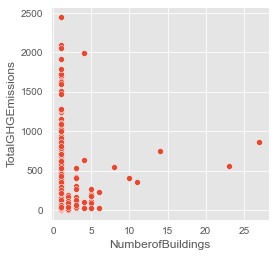

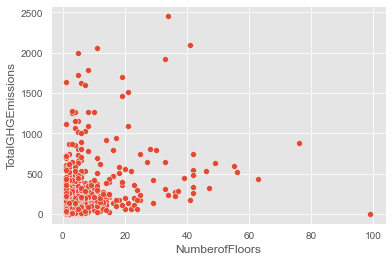

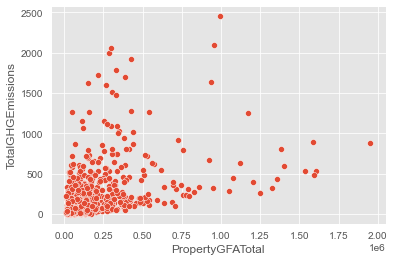

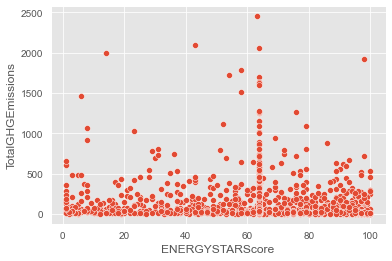

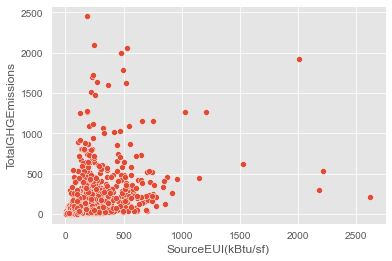

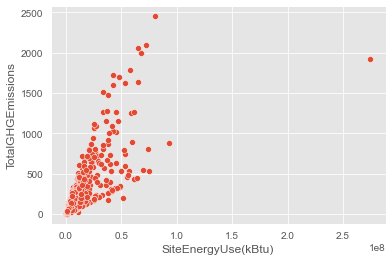

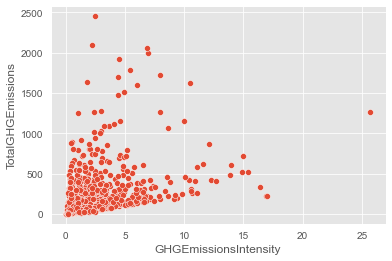

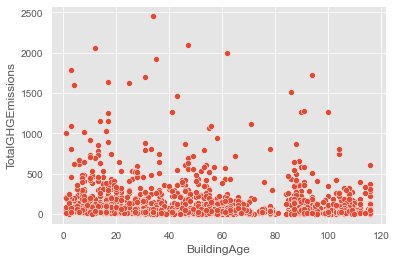

In [265]:
# Generate scatter plot of independent vs Dependent variable
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 18))
index=0
for index,var in enumerate(var_to_scatter_target1):
    
    ax = fig.add_subplot(4, 4, index + 1)
    sns.scatterplot(x=var, y=target1,data=df)
    ax.set_ylabel(target1, size = 12)
    ax.set_xlabel(var, size = 12)
    plt.show()

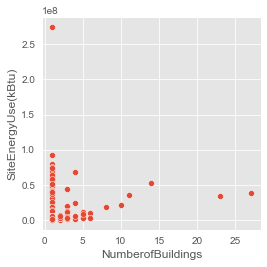

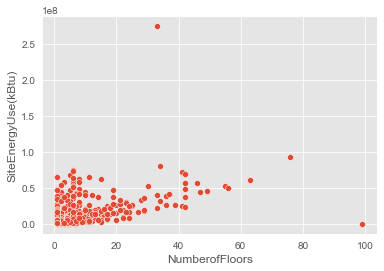

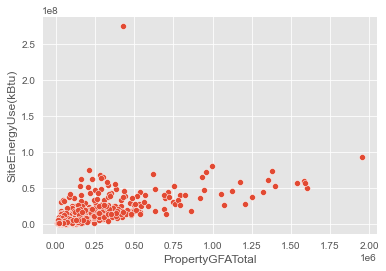

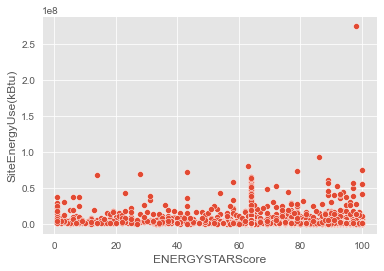

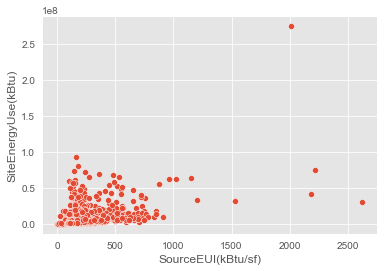

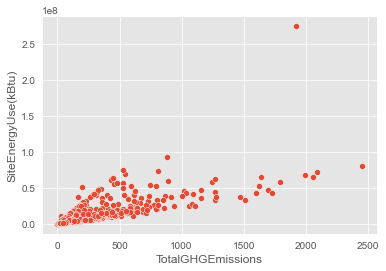

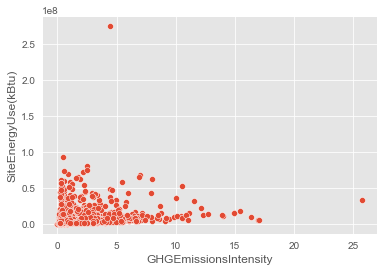

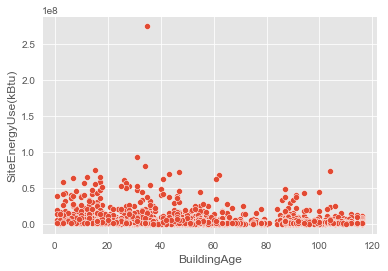

In [266]:
# Generate scatter plot of independent vs Dependent variable
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 18))
index=0
for index,var in enumerate(var_to_scatter_target2):
    
    ax = fig.add_subplot(4, 4, index + 1)
    sns.scatterplot(x=var, y=target2,data=df)
    ax.set_ylabel(target2, size = 12)
    ax.set_xlabel(var, size = 12)
    plt.show()

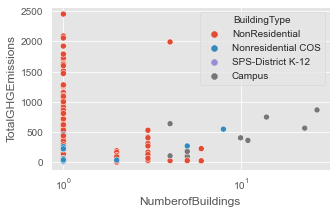

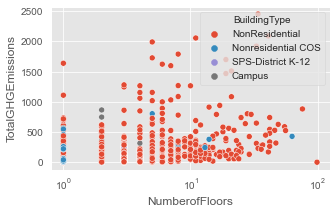

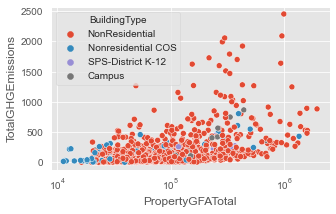

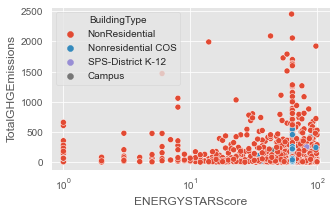

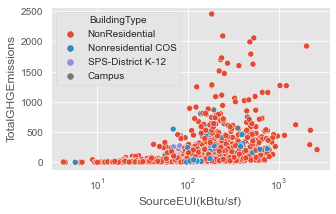

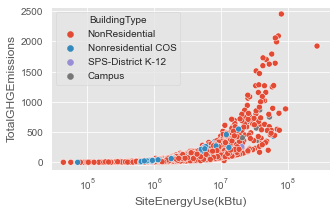

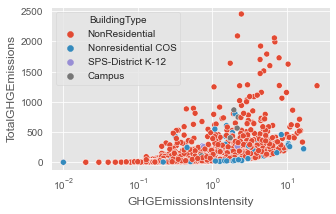

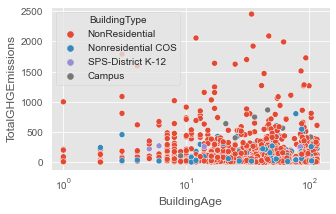

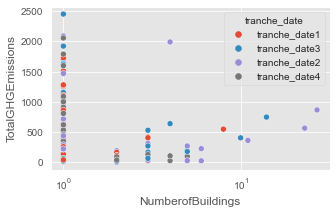

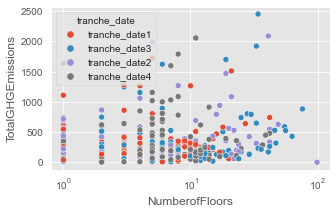

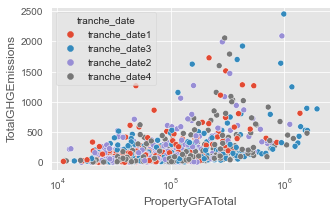

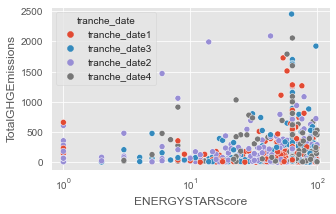

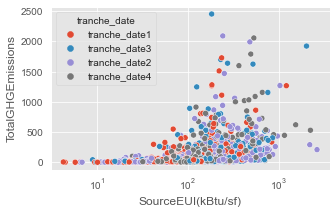

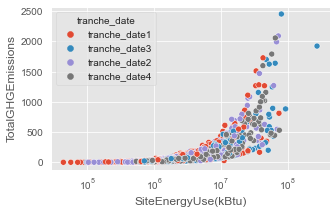

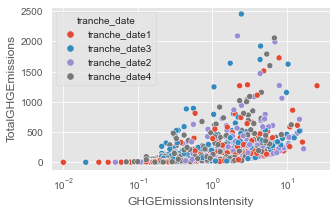

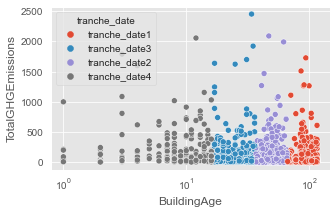

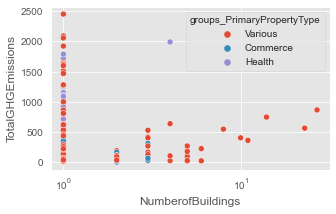

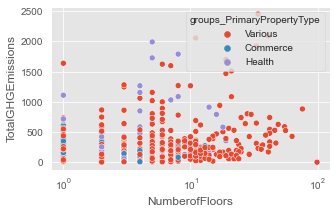

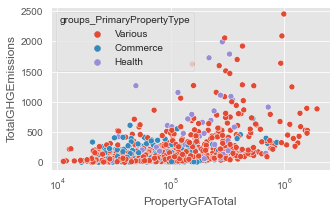

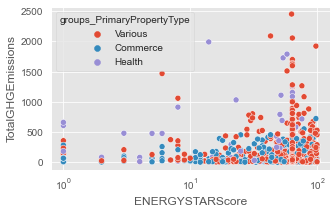

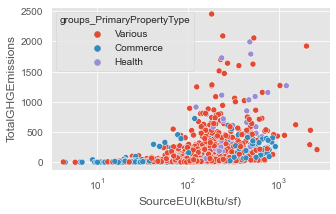

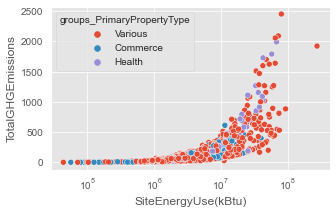

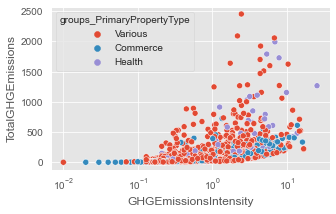

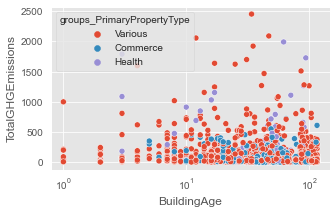

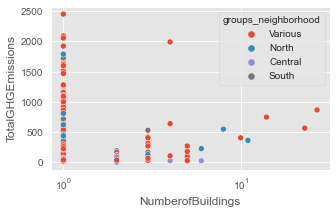

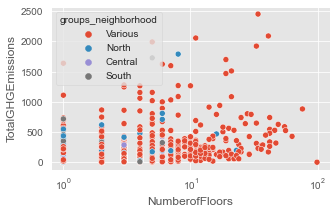

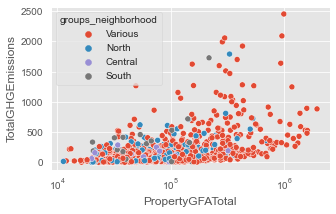

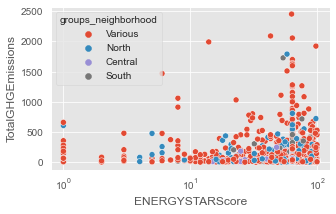

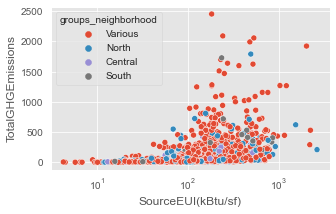

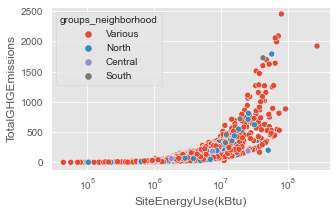

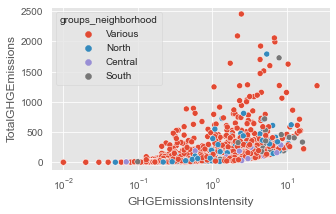

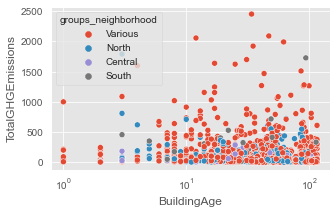

In [267]:
#target1
for h in cat_cols_scatter:
    for column in var_to_scatter_target1:
        plot_scatter(h,column,target1)
  

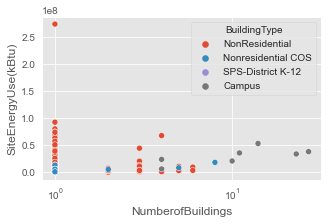

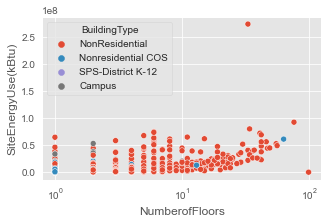

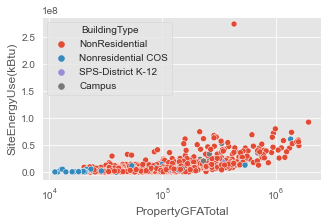

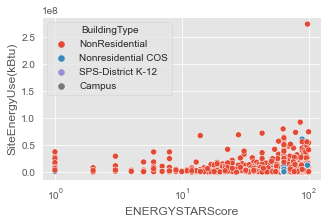

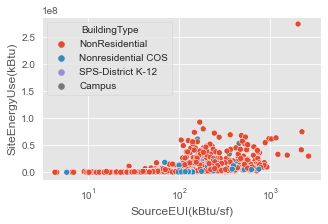

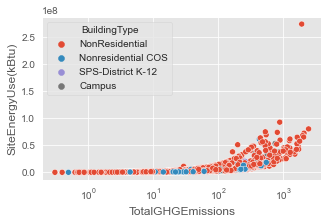

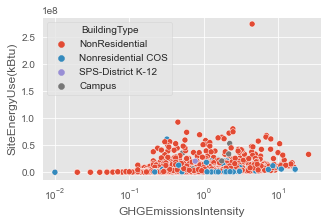

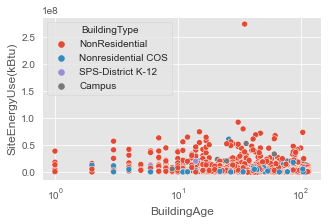

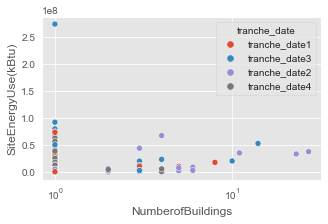

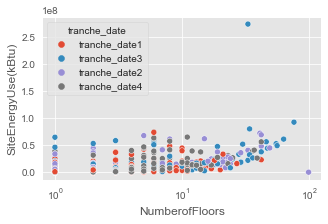

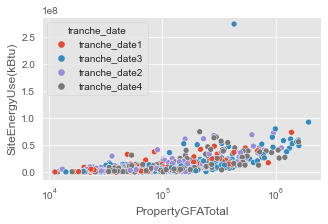

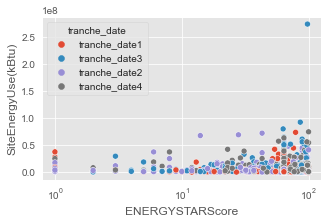

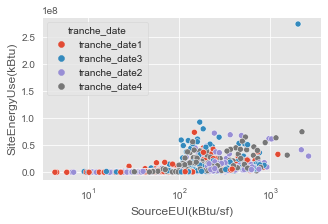

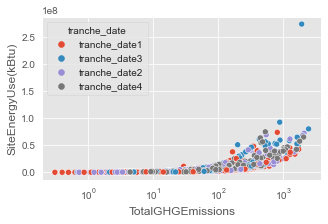

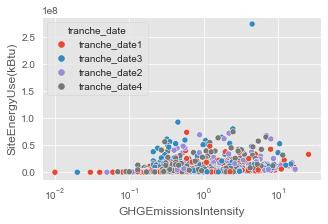

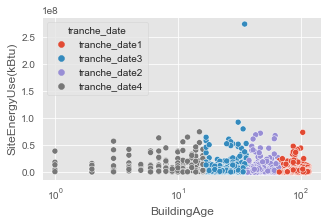

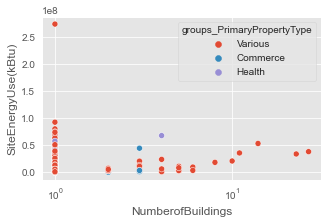

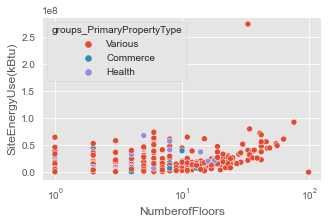

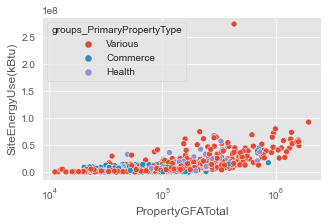

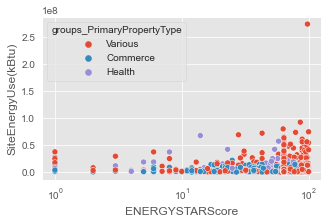

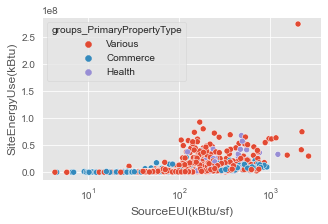

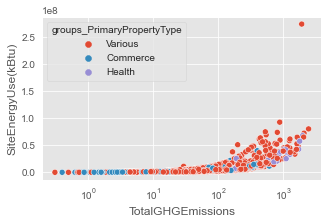

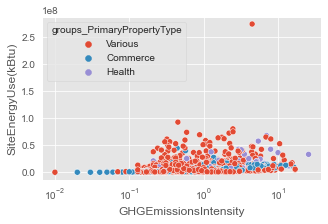

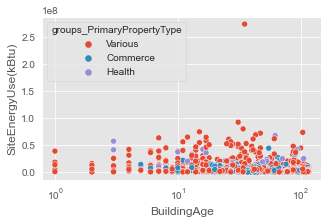

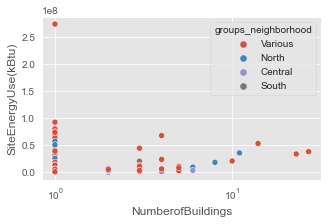

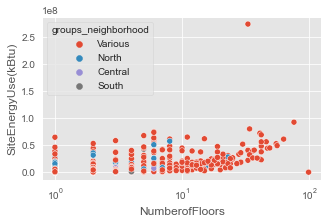

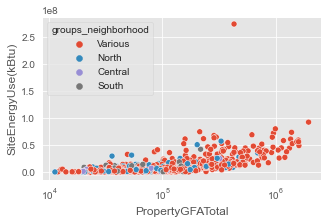

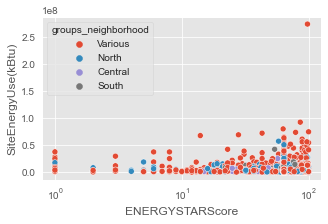

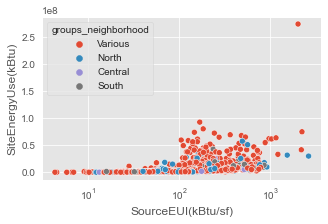

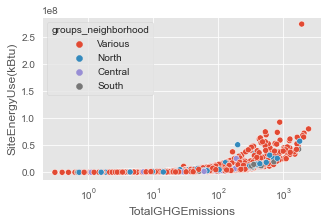

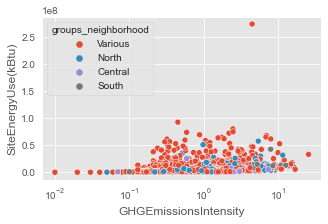

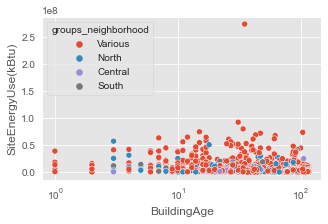

In [268]:
#target1
for h in cat_cols_scatter:
    for column in var_to_scatter_target2:
        plot_scatter(h,column,target2)
  

**Observations**
<br>
Que les deux cibles sont colinéaires

In [269]:
#df[['BuildingType','NumberofBuildings']]


In [270]:
df.columns

Index(['OSEBuildingID', 'BuildingType', 'Latitude', 'Longitude',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'tranche_date', 'BuildingAge',
       'groups_neighborhood', 'groups_PrimaryPropertyType'],
      dtype='object')

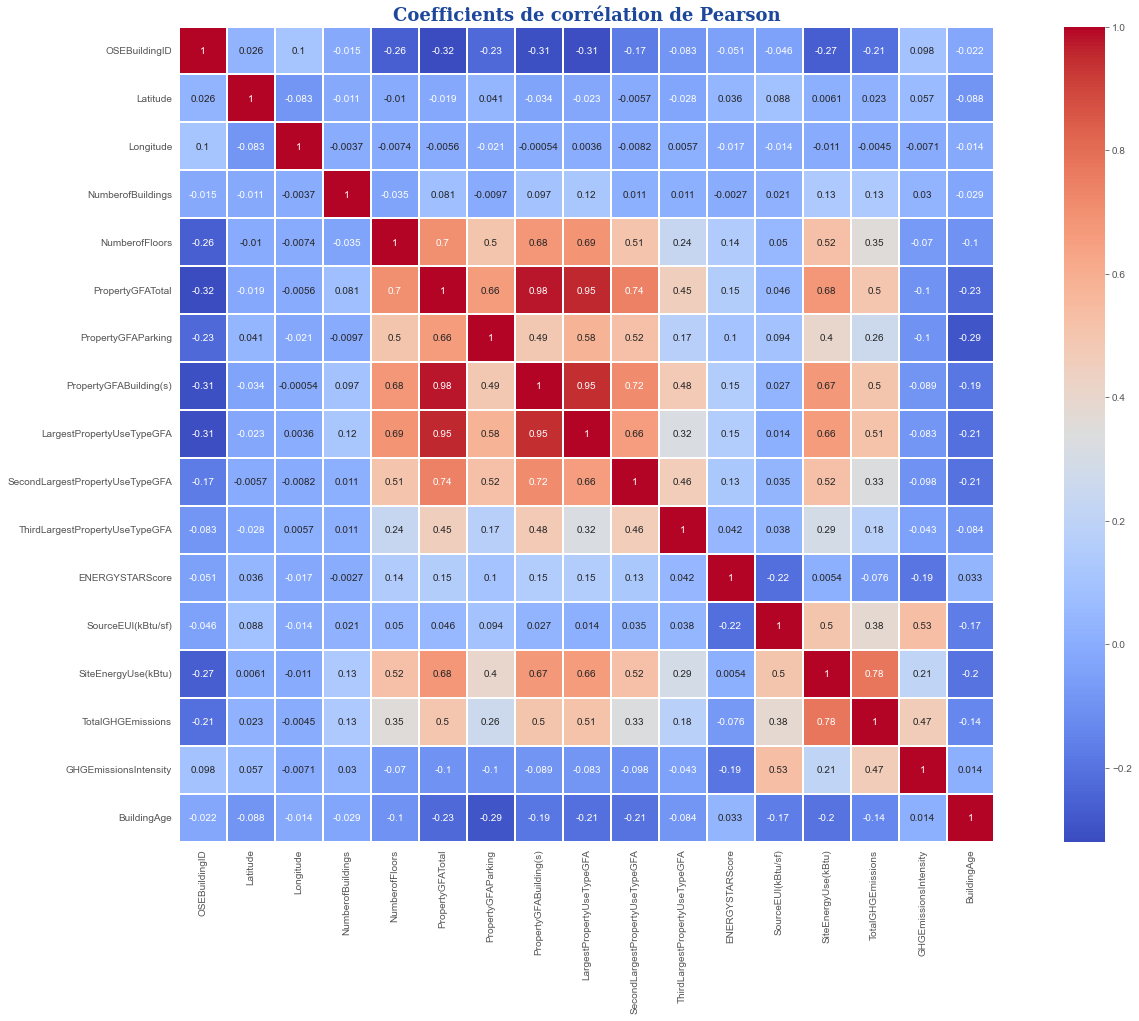

In [271]:
#look for correlated variables
fig=plt.figure(figsize=(25,15))


# corr_mat = df[[
#  'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
#        'PropertyGFAParking', 'PropertyGFABuilding(s)',
#        'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
#        'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
#        'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
#        'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
#        'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
#        'TotalGHGEmissions', 'GHGEmissionsIntensity',
#        'BuildingAge']].corr()
corr_mat = df.corr()
sns.heatmap(corr_mat, square=True, linewidths=0.01, annot=True, cmap='coolwarm')
plt.title("Coefficients de corrélation de Pearson", fontdict=font_title)
plt.show()

In [272]:
threshold_up = 0.7
corr_pairs = df.corr().unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold_up)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & 
                          (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

level_0                          level_1  \
12           PropertyGFABuilding(s)                 PropertyGFATotal   
10                 PropertyGFATotal        LargestPropertyUseTypeGFA   
8            PropertyGFABuilding(s)        LargestPropertyUseTypeGFA   
6                 TotalGHGEmissions              SiteEnergyUse(kBtu)   
4   SecondLargestPropertyUseTypeGFA                 PropertyGFATotal   
2            PropertyGFABuilding(s)  SecondLargestPropertyUseTypeGFA   
0                    NumberofFloors                 PropertyGFATotal   

    corr_coeff  
12    0.977386  
10    0.954635  
8     0.947196  
6     0.776243  
4     0.742546  
2     0.716156  
0     0.702234

**Note**
<br>
LEs  variables suffixées GFA présentent de fortes corrélations avec plusieurs autres variables. Nous allons donc créer de nouvelles variables pour tenter d'éviter ces corrélations linéaires :

In [273]:
def split_words(df, column = None):
    list_words = set()
    for word in df[column].str.split(','):
        if isinstance(word, float):
            continue
        list_words = set().union(word, list_words)
    return list(list_words)

list_use_type = split_words(df, 'ListOfAllPropertyUseTypes')
print("Nombre de type d'usages dans la base : {}".format(len(list_use_type)))

Nombre de type d'usages dans la base : 113


**Note**
<br>
Afin de préparer un OneHotEncoder, nous allons créer une variable donnant le nombre total d'usages du bâtiment, puis supprimer la liste complète des usages :

In [274]:
df['TotalUseTypeNumber'] = [str(word).count(",") + 1 for word in df['ListOfAllPropertyUseTypes'].str.split(',')]
df.drop('ListOfAllPropertyUseTypes', axis=1, inplace=True)

In [275]:
gfa_features = find_component(df, suffix='GFA')
df[['TotalUseTypeNumber'] + gfa_features].head(5)

TotalUseTypeNumber  PropertyGFATotal  PropertyGFAParking  \
0                   1             88434                   0   
1                   3            103566               15064   
2                   1            956110              196718   
3                   1             61320                   0   
4                   3            175580               62000   

   PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
0                   88434                    88434.0   
1                   88502                    83880.0   
2                  759392                   756493.0   
3                   61320                    61320.0   
4                  113580                   123445.0   

   SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  
0                     36266.253021                    15054.316181  
1                     15064.000000                     4622.000000  
2                     36266.253021                    15054.316181  
3                     36266.253021                    15054.316181  
4                     68009.000000                        0.000000

In [276]:
# Calcul des ratios
df['GFABuildingRate'] = (round((df['PropertyGFABuilding(s)'].fillna(0)
                                  /df['PropertyGFATotal'].fillna(0)),5))
df['GFAParkingRate'] = (round((df['PropertyGFAParking'].fillna(0)
                                 /df['PropertyGFATotal'].fillna(0)),5))

# Suppression des variables inutiles
df.drop(['LargestPropertyUseTypeGFA', 
           'SecondLargestPropertyUseTypeGFA',
           'SecondLargestPropertyUseType',
           'ThirdLargestPropertyUseTypeGFA',
           'ThirdLargestPropertyUseType',
           'PropertyGFAParking',
           'PropertyGFABuilding(s)'],
         axis=1, inplace=True)




**Note**
<br>
vérifions la corrélation

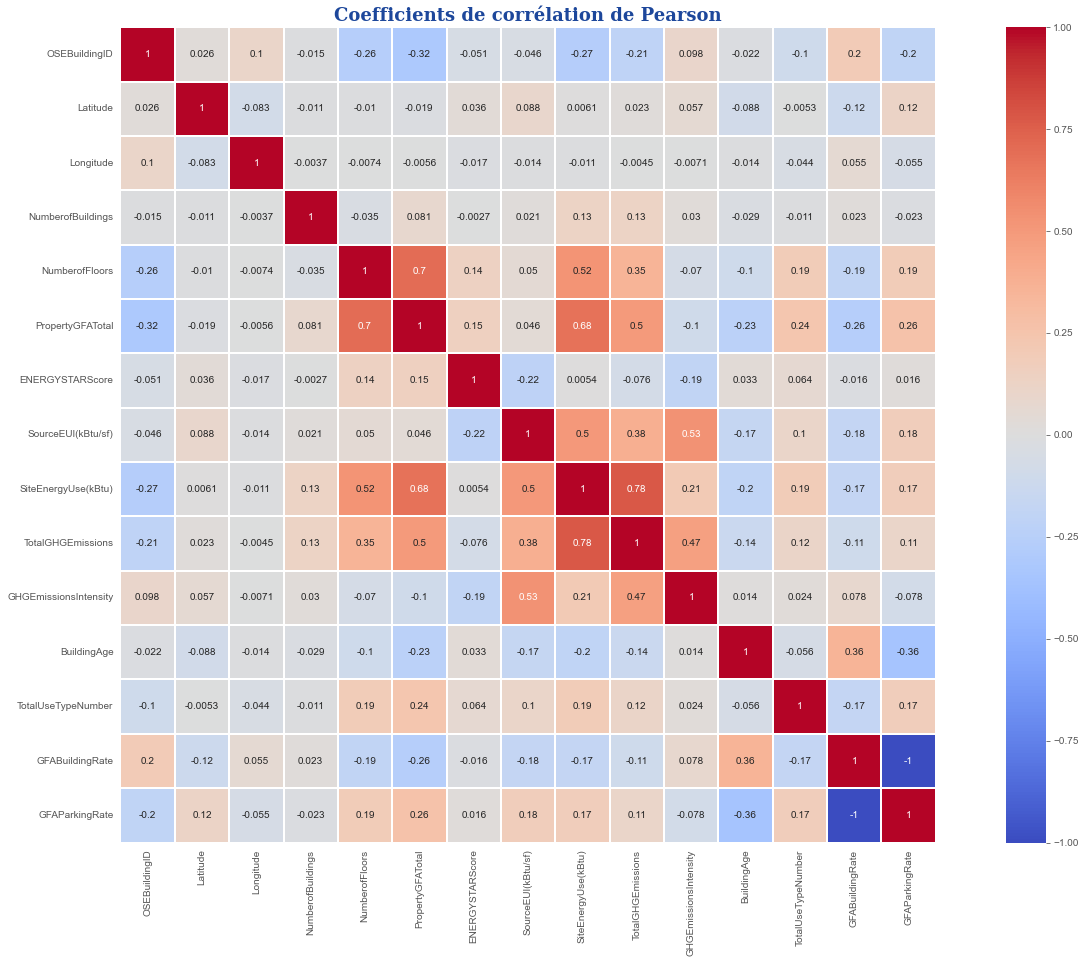

In [277]:
fig=plt.figure(figsize=(25,15))


# corr_mat = df[[
#  'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
#        'PropertyGFAParking', 'PropertyGFABuilding(s)',
#        'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
#        'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
#        'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
#        'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
#        'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
#        'TotalGHGEmissions', 'GHGEmissionsIntensity',
#        'BuildingAge']].corr()
corr_mat = df.corr()
sns.heatmap(corr_mat, square=True, linewidths=0.01, annot=True, cmap='coolwarm')
plt.title("Coefficients de corrélation de Pearson", fontdict=font_title)
plt.show()

In [278]:
threshold_up = 0.7
corr_pairs = corr_mat.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold_up)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & 
                          (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

level_0            level_1  corr_coeff
4  SiteEnergyUse(kBtu)  TotalGHGEmissions    0.776243
2       NumberofFloors   PropertyGFATotal    0.702234
0      GFABuildingRate     GFAParkingRate   -1.000000

In [279]:
df.columns

Index(['OSEBuildingID', 'BuildingType', 'Latitude', 'Longitude',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseType', 'ENERGYSTARScore', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'tranche_date', 'BuildingAge', 'groups_neighborhood',
       'groups_PrimaryPropertyType', 'TotalUseTypeNumber', 'GFABuildingRate',
       'GFAParkingRate'],
      dtype='object')

In [280]:
df.columns

Index(['OSEBuildingID', 'BuildingType', 'Latitude', 'Longitude',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseType', 'ENERGYSTARScore', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'tranche_date', 'BuildingAge', 'groups_neighborhood',
       'groups_PrimaryPropertyType', 'TotalUseTypeNumber', 'GFABuildingRate',
       'GFAParkingRate'],
      dtype='object')

In [281]:
cols_to_keep=['OSEBuildingID', 'BuildingType',
        'NumberofBuildings', 'NumberofFloors',
       'LargestPropertyUseType', 'ENERGYSTARScore',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'tranche_date', 'BuildingAge',
       'groups_neighborhood', 'groups_PrimaryPropertyType',
       'TotalUseTypeNumber', 'GFABuildingRate', 'GFAParkingRate']
df=df[cols_to_keep]

In [282]:
df.columns

Index(['OSEBuildingID', 'BuildingType', 'NumberofBuildings', 'NumberofFloors',
       'LargestPropertyUseType', 'ENERGYSTARScore', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'tranche_date', 'BuildingAge', 'groups_neighborhood',
       'groups_PrimaryPropertyType', 'TotalUseTypeNumber', 'GFABuildingRate',
       'GFAParkingRate'],
      dtype='object')

# 5.Sauvegarde des données dans un fichier csv<a class="anchor" id="cs"></a>

In [283]:
#sauvegarde des données cleanées
#df.to_csv('data2.csv', sep='\t',index=False)
#df.set_index("OSEBuildingID").to_csv('prepared_data.csv', sep='\t')
df.to_csv('test.csv', sep='\t',index=False)

In [284]:
df1=df.copy()

In [285]:
from scipy.stats import skew

In [286]:
#num_feats = df[df.dtypes.dtypes!="object"].index
num_feats = [col for col in df1.columns if df1[col].dtype!="O"]
num_feats=set(num_feats)-set(['OSEBuildingID'])

skew_feats=df1[num_feats].skew().sort_values(ascending=False)
skewness=pd.DataFrame({'Skew':skew_feats})
skewness

Skew
NumberofBuildings      16.698428
SiteEnergyUse(kBtu)     8.018692
NumberofFloors          5.875640
SourceEUI(kBtu/sf)      5.038893
TotalGHGEmissions       4.365528
GHGEmissionsIntensity   3.745330
GFAParkingRate          2.361013
TotalUseTypeNumber      2.255963
BuildingAge             0.275967
ENERGYSTARScore        -0.848624
GFABuildingRate        -2.361013

In [287]:
high_skew = skew_feats[np.abs(skew_feats) > 0.3]


In [288]:
skew_index = high_skew.index
from scipy import stats
from scipy.stats import skew, boxcox_normmax, norm
from scipy.special import boxcox1p
for i in skew_index:
    df1[i] = boxcox1p(df1[i], boxcox_normmax(df1[i] + 1))

<AxesSubplot:>

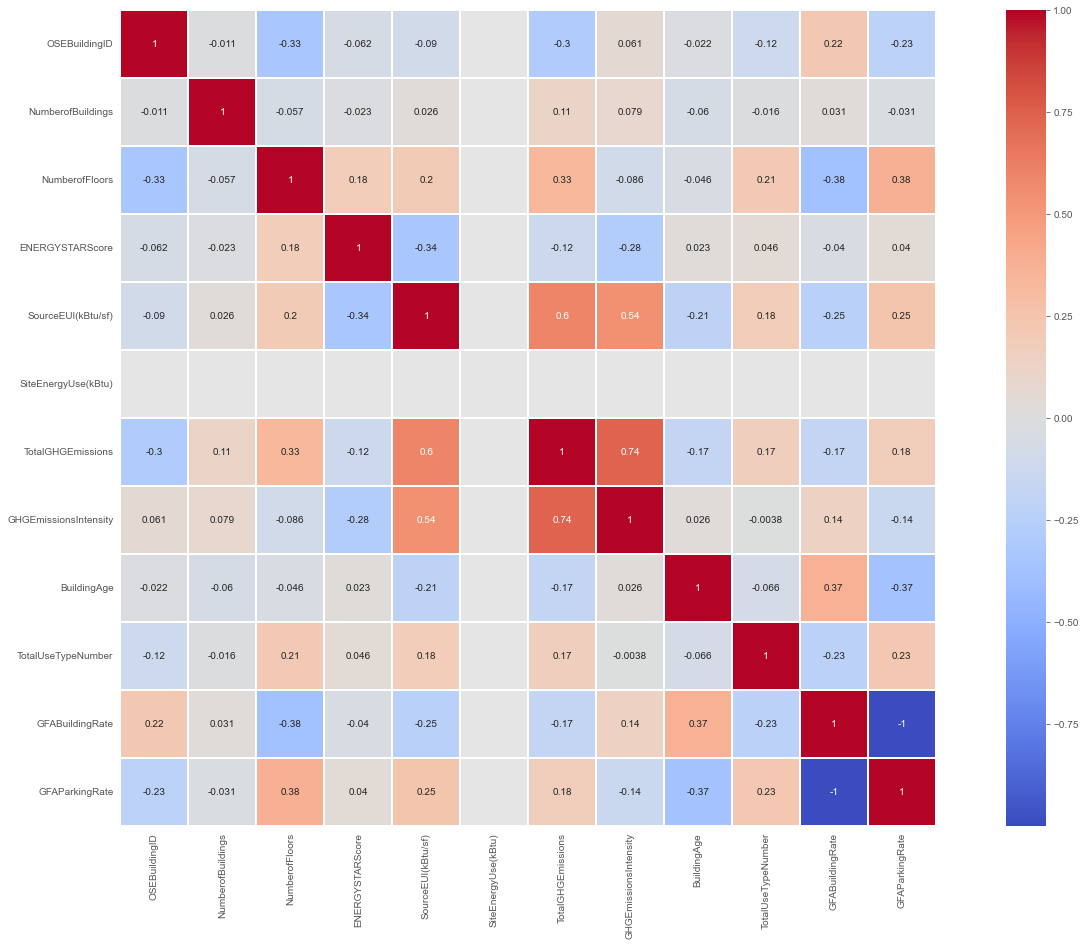

In [289]:
fig=plt.figure(figsize=(25,15))
sns.heatmap(df1.corr(), square=True, linewidths=0.01, annot=True, cmap='coolwarm')


In [290]:
threshold_up = 0.7
corr_pairs = df.corr().unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold_up)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & 
                          (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

level_0            level_1  corr_coeff
2  SiteEnergyUse(kBtu)  TotalGHGEmissions    0.776243
0      GFABuildingRate     GFAParkingRate   -1.000000

In [292]:
df1.to_csv('not_skewed_test.csv', sep='\t',index=False)

In [293]:
df1.columns

Index(['OSEBuildingID', 'BuildingType', 'NumberofBuildings', 'NumberofFloors',
       'LargestPropertyUseType', 'ENERGYSTARScore', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'tranche_date', 'BuildingAge', 'groups_neighborhood',
       'groups_PrimaryPropertyType', 'TotalUseTypeNumber', 'GFABuildingRate',
       'GFAParkingRate'],
      dtype='object')

In [294]:
# from sklearn.preprocessing import PowerTransformer, QuantileTransformer
# def test_transformers(columns):
#     pt = PowerTransformer()
#     qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
#     fig = plt.figure(figsize=(20,30))
#     j = 1
#     for i in columns:
#         array = np.array(df[i]).reshape(-1, 1)
#         y = pt.fit_transform(array)
#         x = qt.fit_transform(array)
#         plt.subplot(len(columns),3,j)
#         sns.histplot(array, bins = 50, kde = True)
#         plt.title(f"Original Distribution for {i}")
#         plt.subplot(len(columns),3,j+1)
#         sns.histplot(x, bins = 50, kde = True)
#         plt.title(f"Quantile Transform for {i}")
#         plt.subplot(len(columns),3,j+2)
#         sns.histplot(y, bins = 50, kde = True)
#         plt.title(f"Power Transform for {i}")
#         j += 3
# test_transformers(num_feats)